In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_new = pd.read_csv('df_new.csv', index_col=0)
df_new.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,1.767767,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,22.010473
2,abbreviate,10,1.809143,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,17.096149
3,abdicate,8,2.047926,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,16.921411
4,abdication,10,1.961122,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,16.967395
5,abdomen,7,2.171175,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,20.507543


In [3]:
df_new = df_new.drop(['word', 'concreteness', 'dominance', 'familiarity'], axis = 1)
df_new.head()

,length,arousal,valence,imageability,aoa,semsize,gender,polysemy,web_corpus_freq
1,5,1.767767,5.781,5.344,5.177,5.121,3.303,0,22.010473
2,10,1.809143,5.250,3.177,5.543,2.667,3.971,0,17.096149
3,8,2.047926,3.767,2.516,6.233,4.679,5.167,0,16.921411
4,10,1.961122,3.880,2.571,6.407,5.083,4.571,0,16.967395
5,7,2.171175,5.486,6.235,5.457,3.529,4.600,0,20.507543


# Pattern Mining Preprocessing

##### Discretization of continuous variables

In [4]:
#df['AgeBin'] = pd.cut(df['Age'], 4)
df_new['AROUbin'] = pd.qcut(df_new['arousal'], 4)
df_new['VALbin'] = pd.qcut(df_new['valence'], 4)
df_new['IMAGbin'] = pd.qcut(df_new['imageability'], 4)
df_new['AOAbin'] = pd.qcut(df_new['aoa'], 4)
df_new['SIZEbin'] = pd.qcut(df_new['semsize'], 4)
df_new['GENDbin'] = pd.qcut(df_new['gender'], 4)
df_new['WCFbin'] = pd.qcut(df_new['web_corpus_freq'], 4)

df_new.drop(['arousal', 'valence', 'imageability', 'aoa', 'semsize', 'gender', 'web_corpus_freq'], axis=1, inplace=True)
df_new.head()

,length,polysemy,AROUbin,VALbin,IMAGbin,AOAbin,SIZEbin,GENDbin,WCFbin
1,5,0,"(1.433, 1.956]","(5.286, 6.061]","(4.657, 6.031]","(5.143, 6.971]","(4.879, 6.912]","(1.9680000000000002, 3.636]","(20.76, 22.493]"
2,10,0,"(1.433, 1.956]","(4.147, 5.286]","(1.82, 3.514]","(5.143, 6.971]","(1.374, 3.412]","(3.636, 4.121]","(13.639000000000001, 20.76]"
3,8,0,"(1.956, 2.132]","(1.2180000000000002, 4.147]","(1.82, 3.514]","(5.143, 6.971]","(4.171, 4.879]","(4.647, 6.219]","(13.639000000000001, 20.76]"
4,10,0,"(1.956, 2.132]","(1.2180000000000002, 4.147]","(1.82, 3.514]","(5.143, 6.971]","(4.879, 6.912]","(4.121, 4.647]","(13.639000000000001, 20.76]"
5,7,0,"(2.132, 2.318]","(5.286, 6.061]","(6.031, 6.941]","(5.143, 6.971]","(3.412, 4.171]","(4.121, 4.647]","(13.639000000000001, 20.76]"


In [5]:
df_new['AROUbin'] = df_new['AROUbin'].astype(str) + '_arou'
df_new['VALbin'] = df_new['VALbin'].astype(str) + '_val'
df_new['IMAGbin'] = df_new['IMAGbin'].astype(str) + '_imag'
df_new['AOAbin'] = df_new['AOAbin'].astype(str) + '_aoa'
df_new['SIZEbin'] = df_new['SIZEbin'].astype(str) + '_size'
df_new['GENDbin'] = df_new['GENDbin'].astype(str) + '_gend'
df_new['WCFbin'] = df_new['WCFbin'].astype(str) + '_wcf'
df_new.head()

,length,polysemy,AROUbin,VALbin,IMAGbin,AOAbin,SIZEbin,GENDbin,WCFbin
1,5,0,"(1.433, 1.956]_arou","(5.286, 6.061]_val","(4.657, 6.031]_imag","(5.143, 6.971]_aoa","(4.879, 6.912]_size","(1.9680000000000002, 3.636]_gend","(20.76, 22.493]_wcf"
2,10,0,"(1.433, 1.956]_arou","(4.147, 5.286]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(1.374, 3.412]_size","(3.636, 4.121]_gend","(13.639000000000001, 20.76]_wcf"
3,8,0,"(1.956, 2.132]_arou","(1.2180000000000002, 4.147]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(4.171, 4.879]_size","(4.647, 6.219]_gend","(13.639000000000001, 20.76]_wcf"
4,10,0,"(1.956, 2.132]_arou","(1.2180000000000002, 4.147]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(4.879, 6.912]_size","(4.121, 4.647]_gend","(13.639000000000001, 20.76]_wcf"
5,7,0,"(2.132, 2.318]_arou","(5.286, 6.061]_val","(6.031, 6.941]_imag","(5.143, 6.971]_aoa","(3.412, 4.171]_size","(4.121, 4.647]_gend","(13.639000000000001, 20.76]_wcf"


In [6]:
poly_dict = {0: 'not ambiguous', 1: 'ambiguous'}
df_new['polysemy'] = df_new['polysemy'].map(poly_dict)
df_new.head()

,length,polysemy,AROUbin,VALbin,IMAGbin,AOAbin,SIZEbin,GENDbin,WCFbin
1,5,not ambiguous,"(1.433, 1.956]_arou","(5.286, 6.061]_val","(4.657, 6.031]_imag","(5.143, 6.971]_aoa","(4.879, 6.912]_size","(1.9680000000000002, 3.636]_gend","(20.76, 22.493]_wcf"
2,10,not ambiguous,"(1.433, 1.956]_arou","(4.147, 5.286]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(1.374, 3.412]_size","(3.636, 4.121]_gend","(13.639000000000001, 20.76]_wcf"
3,8,not ambiguous,"(1.956, 2.132]_arou","(1.2180000000000002, 4.147]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(4.171, 4.879]_size","(4.647, 6.219]_gend","(13.639000000000001, 20.76]_wcf"
4,10,not ambiguous,"(1.956, 2.132]_arou","(1.2180000000000002, 4.147]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(4.879, 6.912]_size","(4.121, 4.647]_gend","(13.639000000000001, 20.76]_wcf"
5,7,not ambiguous,"(2.132, 2.318]_arou","(5.286, 6.061]_val","(6.031, 6.941]_imag","(5.143, 6.971]_aoa","(3.412, 4.171]_size","(4.121, 4.647]_gend","(13.639000000000001, 20.76]_wcf"


In [7]:
length_dict = {2: 'short', 3: 'short', 4: 'short', 5: 'short', 
               6: 'average', 7: 'average', 8: 'average', 
               9: 'long', 10: 'long', 11: 'long', 12: 'long', 13: 'long', 14: 'long', 15: 'long'}
df_new['length'] = df_new['length'].map(length_dict)
df_new.head()

,length,polysemy,AROUbin,VALbin,IMAGbin,AOAbin,SIZEbin,GENDbin,WCFbin
1,short,not ambiguous,"(1.433, 1.956]_arou","(5.286, 6.061]_val","(4.657, 6.031]_imag","(5.143, 6.971]_aoa","(4.879, 6.912]_size","(1.9680000000000002, 3.636]_gend","(20.76, 22.493]_wcf"
2,long,not ambiguous,"(1.433, 1.956]_arou","(4.147, 5.286]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(1.374, 3.412]_size","(3.636, 4.121]_gend","(13.639000000000001, 20.76]_wcf"
3,average,not ambiguous,"(1.956, 2.132]_arou","(1.2180000000000002, 4.147]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(4.171, 4.879]_size","(4.647, 6.219]_gend","(13.639000000000001, 20.76]_wcf"
4,long,not ambiguous,"(1.956, 2.132]_arou","(1.2180000000000002, 4.147]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(4.879, 6.912]_size","(4.121, 4.647]_gend","(13.639000000000001, 20.76]_wcf"
5,average,not ambiguous,"(2.132, 2.318]_arou","(5.286, 6.061]_val","(6.031, 6.941]_imag","(5.143, 6.971]_aoa","(3.412, 4.171]_size","(4.121, 4.647]_gend","(13.639000000000001, 20.76]_wcf"


In [8]:
df_new.length.nunique()

3

In [9]:
df_list = df_new.values.tolist()

In [10]:
df_new.length.value_counts()

average    2008
short      1710
long        638
Name: length, dtype: int64

In [11]:
df_new.polysemy.value_counts()

not ambiguous    3986
ambiguous         371
Name: polysemy, dtype: int64

In [12]:
df_new.length.groupby(df_new['polysemy']).value_counts()

polysemy       length 
ambiguous      short       290
               average      78
               long          3
not ambiguous  average    1930
               short      1420
               long        635
Name: length, dtype: int64

# Frequent Itemsets

In [13]:
## conda install -c conda-forge pyfim
from fim import apriori

In [14]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [15]:
list_freq = []
for i in range (1, 30, 2):
    itemsets = apriori(df_list, target='s', supp=i, zmin=3, report = 'S')
    print('Number of itemsets : {}     supp: {}'.format(len(itemsets),i))
    list_freq.append(len(itemsets))

Number of itemsets : 7701     supp: 1
Number of itemsets : 1054     supp: 3
Number of itemsets : 350     supp: 5
Number of itemsets : 107     supp: 7
Number of itemsets : 46     supp: 9
Number of itemsets : 26     supp: 11
Number of itemsets : 6     supp: 13
Number of itemsets : 0     supp: 15
Number of itemsets : 0     supp: 17
Number of itemsets : 0     supp: 19
Number of itemsets : 0     supp: 21
Number of itemsets : 0     supp: 23
Number of itemsets : 0     supp: 25
Number of itemsets : 0     supp: 27
Number of itemsets : 0     supp: 29


In [16]:
# if supp = 2 -> min_sup = 0.02
# zmin = k 

all_itemsets = apriori(df_list, target='s', supp = 20, zmin = 2, report = 'S')
max_itemsets = apriori(df_list, target='m', supp = 20, zmin = 2, report = 'S')
cls_itemsets = apriori(df_list, target='c', supp = 20, zmin = 2, report = 'S')

In [17]:
print('Min. Support = 0.2 | k = 2')
print('____________________________')
print('All:     ', len(all_itemsets))
print('Maximal: ', len(max_itemsets))
print('Closed:  ', len(cls_itemsets))

Min. Support = 0.2 | k = 2
____________________________
All:      30
Maximal:  30
Closed:   30


In [18]:
#all_itemsets[:5]

In [19]:
print('Frequent Itemset: ', all_itemsets[0][0])
print('Support: ', all_itemsets[0][1] )

Frequent Itemset:  ('(6.061, 8.647]_val', 'not ambiguous')
Support:  23.52536148726188


In [20]:
#max_itemsets = apriori(df_list, target='m', supp = 2, zmin = 2, report = 'S')

In [21]:
print('Frequent Itemset: ', max_itemsets[0][0])
print('Support: ', max_itemsets[0][1] )

Frequent Itemset:  ('(6.061, 8.647]_val', 'not ambiguous')
Support:  23.52536148726188


In [22]:
all_itemsets = apriori(df_list, target='s', supp = 3, zmin = 2, report = 'S')
all_itemsets.sort(key=lambda x:x[1], reverse = True)
print('All Frequent Itemsets | Support 0.03')
print('____________________________________')
all_itemsets[:5]

All Frequent Itemsets | Support 0.03
____________________________________


[(('average', 'not ambiguous'), 44.296534312600414),
 (('short', 'not ambiguous'), 32.59123249942621),
 (('(13.639000000000001, 20.76]_wcf', 'not ambiguous'), 24.535230663300435),
 (('(5.143, 6.971]_aoa', 'not ambiguous'), 24.44342437456966),
 (('(1.82, 3.514]_imag', 'not ambiguous'), 24.053247647463852)]

In [23]:
max_itemsets = apriori(df_list, target='m', supp = 3, zmin = 2, report = 'S')
print('Maximal Frequent Itemsets | Support 0.03')
print('________________________________________')
max_itemsets.sort(key=lambda x:x[1], reverse = True)
max_itemsets[:5]

Maximal Frequent Itemsets | Support 0.03
________________________________________


[(('(3.412, 4.171]_size', 'short', 'not ambiguous'), 8.951113151250862),
 (('(4.121, 4.647]_gend', 'short', 'not ambiguous'), 7.964195547394996),
 (('(1.956, 2.132]_arou', 'short', 'not ambiguous'), 7.941243975212302),
 (('(3.514, 4.657]_imag', 'short', 'not ambiguous'), 7.826486114298829),
 (('(4.171, 4.879]_size', 'short', 'not ambiguous'), 6.931374799173744)]

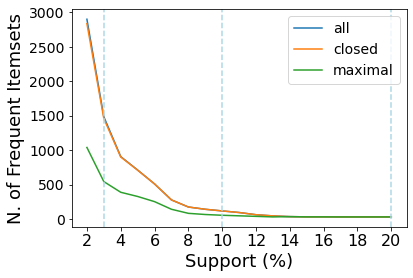

In [24]:
# maximal frequent itemsets is the subset of all and closed
# all and cls are almost the same
len_max_it = []
len_all_it = []
len_cls_it = []
for i in range(2, 20+1):
    all_itemsets = apriori(df_list, target='s', supp = i, zmin = 2)    
    max_itemsets = apriori(df_list, target='m', supp = i, zmin = 2)   
    cls_itemsets = apriori(df_list, target='c', supp = i, zmin = 2)   
    len_all_it.append( len(all_itemsets) )
    len_max_it.append( len(max_itemsets) )
    len_cls_it.append( len(cls_itemsets) )
    
plt.plot(len_all_it, label = 'all')
plt.plot(len_cls_it, label = 'closed')
plt.plot(len_max_it, label = 'maximal')
plt.legend(fontsize = 14, loc = 'best')
plt.xlabel('Support (%)', fontsize = 18)
plt.ylabel('N. of Frequent Itemsets', fontsize = 18)
plt.xticks(np.arange(0, 20, 2), np.arange(2, 22, 2), fontsize=16)
plt.yticks(fontsize = 14)
plt.axvline(1, color='lightblue', linestyle='--')
plt.axvline(8, color='lightblue', linestyle='--')
plt.axvline(18, color='lightblue', linestyle='--')
plt.show()

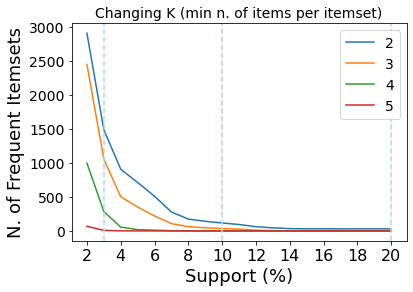

In [25]:
a = 2
b = 3
c = 4
d = 5

len_zmin_a = []
len_zmin_b = []
len_zmin_c = []
len_zmin_d = []

for i in range(2, 20+1):
    
    itemsets_a = apriori(df_list, target='s', supp = i, zmin = a, conf = 30, report = 'aScl')
    itemsets_b = apriori(df_list, target='s', supp = i, zmin = b, conf = 30, report = 'aScl')
    itemsets_c = apriori(df_list, target='s', supp = i, zmin = c, conf = 30, report = 'aScl')
    itemsets_d = apriori(df_list, target='s', supp = i, zmin = d, conf = 30, report = 'aScl')
     
    len_zmin_a.append( len( itemsets_a ) )
    len_zmin_b.append( len( itemsets_b ) )
    len_zmin_c.append( len( itemsets_c ) )
    len_zmin_d.append( len( itemsets_d ) )
    
plt.plot( len_zmin_a , label = a)
plt.plot( len_zmin_b , label = b)
plt.plot( len_zmin_c , label = c)
plt.plot( len_zmin_d , label = d)

plt.legend(fontsize = 14, loc = 'best')
plt.title('Changing K (min n. of items per itemset)', fontsize = 14)

plt.xlabel('Support (%)', fontsize = 18)
plt.ylabel('N. of Frequent Itemsets', fontsize = 18)
plt.xticks(np.arange(0, 20, 2), np.arange(2, 22, 2), fontsize=16)
plt.yticks(fontsize = 14)

plt.axvline(1, color='lightblue', linestyle='--')
plt.axvline(8, color='lightblue', linestyle='--')
plt.axvline(18, color='lightblue', linestyle='--')

plt.show()

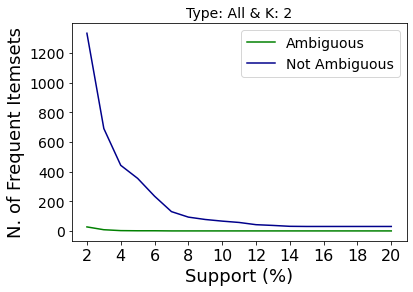

In [26]:
filter_1 = []
filter_2 = []

for i in range(2, 20+1):
    all_itemsets = apriori(df_list, target='s', supp = i, zmin = 2)   
    
    filter_1.append( len([item for item in all_itemsets if 'ambiguous' in item[0]]) )
    filter_2.append( len([item for item in all_itemsets if 'not ambiguous' in item[0]]) )
    
plt.plot(filter_1, label = 'Ambiguous'     ,  color = 'green'   )
plt.plot(filter_2, label = 'Not Ambiguous' ,  color = 'darkblue')

plt.legend(fontsize = 14, loc = 'best')

plt.title('Type: All & K: 2' , fontsize = 14)

plt.xlabel('Support (%)', fontsize = 18)
plt.ylabel('N. of Frequent Itemsets', fontsize = 18)
plt.xticks(np.arange(0, 20, 2), np.arange(2, 22, 2), fontsize=16)
#plt.axvline(1, color='lightblue', linestyle='--')
#plt.axvline(8, color='lightblue', linestyle='--')
#plt.axvline(18, color='lightblue', linestyle='--')
plt.yticks(fontsize = 14)
plt.show()

In [27]:
## find the highest number of zmin

# Association Rules

In [28]:
# target='r' --> RULES
# report = 'aScl' --> a->absolute support; S-> freq. of the rule; c->conf. of the rule; l->lift of the rule;

rules = apriori(df_list, target='r', supp = 3, zmin = 2, conf = 90, report = 'aScl')

In [29]:
rules

[('not ambiguous',
  ('long', '(6.061, 8.647]_val'),
  206,
  4.72802386963507,
  0.9903846153846154,
  1.08256542128218),
 ('not ambiguous',
  ('long', '(4.171, 5.143]_aoa'),
  202,
  4.636217580904292,
  0.9950738916256158,
  1.087691155497443),
 ('not ambiguous',
  ('long', '(5.143, 6.971]_aoa', '(4.879, 6.912]_size'),
  132,
  3.029607528115676,
  1.0,
  1.0930757651781233),
 ('not ambiguous',
  ('long', '(5.143, 6.971]_aoa', '(13.639000000000001, 20.76]_wcf'),
  135,
  3.0984622446637595,
  1.0,
  1.0930757651781233),
 ('not ambiguous',
  ('long', '(5.143, 6.971]_aoa', '(1.82, 3.514]_imag'),
  138,
  3.1673169612118435,
  0.9928057553956835,
  1.0852119107523814),
 ('not ambiguous',
  ('long', '(5.143, 6.971]_aoa'),
  283,
  6.495294927702548,
  0.9964788732394366,
  1.0892269068500315),
 ('not ambiguous',
  ('long', '(4.647, 6.219]_gend'),
  167,
  3.832912554509984,
  1.0,
  1.0930757651781233),
 ('not ambiguous',
  ('long', '(4.879, 6.912]_size', '(2.318, 2.788]_arou'),
  151,


In [30]:
list_AR = []
for i in range(20, 90, 10):
    ass_rules = apriori(df_list, target='r', supp=5, conf=i, zmin=3, report = 'aScl')
    print('Number of AR : {}     supp: {}'.format(len(ass_rules),i))
    list_AR.append(len(ass_rules))

Number of AR : 12165     supp: 20
Number of AR : 4958     supp: 30
Number of AR : 2034     supp: 40
Number of AR : 1108     supp: 50
Number of AR : 497     supp: 60
Number of AR : 386     supp: 70
Number of AR : 340     supp: 80


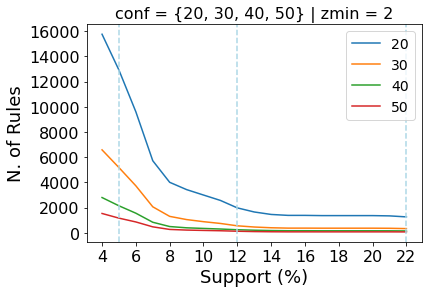

In [31]:
k = 2

a = 20
b = 30
c = 40
d = 50

len_zmin_a = []
len_zmin_b = []
len_zmin_c = []
len_zmin_d = []

for i in range(4, 22+1):
    
    rules_a = apriori(df_list, target='r', supp = i, zmin = k, conf = a, report = 'aScl')
    rules_b = apriori(df_list, target='r', supp = i, zmin = k, conf = b, report = 'aScl')
    rules_c = apriori(df_list, target='r', supp = i, zmin = k, conf = c, report = 'aScl')
    rules_d = apriori(df_list, target='r', supp = i, zmin = k, conf = d, report = 'aScl')
     
    len_zmin_a.append( len( rules_a ) )
    len_zmin_b.append( len( rules_b ) )
    len_zmin_c.append( len( rules_c ) )
    len_zmin_d.append( len( rules_d ) )
    
plt.plot( len_zmin_a , label = a)
plt.plot( len_zmin_b , label = b)
plt.plot( len_zmin_c , label = c)
plt.plot( len_zmin_d , label = d)

plt.legend(fontsize = 14, loc = 'best')

title_str = 'conf = {' + str(a) + ', ' + str(b) + ', ' + str(c)+ ', ' + str(d) + '} | zmin = ' + str(k)

plt.title(title_str, fontsize = 16)

plt.xlabel('Support (%)', fontsize = 18)
plt.ylabel('N. of Rules', fontsize = 18)
plt.xticks(np.arange(0, 20, 2), np.arange(4, 24, 2), fontsize=16)
plt.yticks(fontsize = 16)

plt.axvline(1, color='lightblue', linestyle='--')
plt.axvline(8, color='lightblue', linestyle='--')
plt.axvline(18, color='lightblue', linestyle='--')

plt.show()

In [32]:
rules = apriori(df_list, target='r', supp = 3, zmin = 2, conf = 30, report = 'aScl')

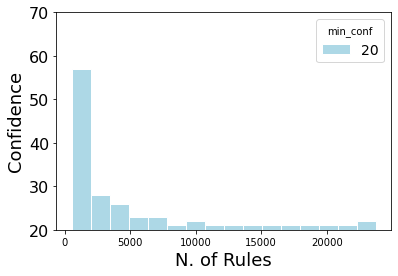

In [33]:
k = 2

len_rules = []

for i in range(20, 80+10):
    
    rules = apriori(df_list, target='r', supp = 3, zmin = k, conf = i, report = 'aScl')

    len_rules.append( len( rules ) )

plt.hist( len_rules, label = a, color = 'lightblue', edgecolor ='w', bins = 16)
legend = plt.legend(fontsize = 14, loc = 'best')
legend.set_title("min_conf")   

#title_str = 'conf = {' + str(a) + ', ' + str(b) + ', ' + str(c)+ ', ' + str(d) + '} | zmin = ' + str(k)

#plt.title(title_str, fontsize = 16)

plt.xlabel('N. of Rules', fontsize = 18)
plt.ylabel('Confidence', fontsize = 18)
plt.yticks(np.arange(0, 60, 10), np.arange(20, 80, 10), fontsize=16)
plt.yticks(fontsize = 16)

#plt.axvline(1, color='lightblue', linestyle='--')
#plt.axvline(8, color='lightblue', linestyle='--')
#plt.axvline(18, color='lightblue', linestyle='--')

plt.show()

In [34]:
len(rules)

539

In [35]:
results = []
for s in range(3, 25):
    for c in range(10, 80, 10):
        rules = apriori(df_list, supp=s, zmin=2, zmax = 3, target='r', conf=c, report='SCl')
        for e in rules: 
            results.append({
                'supp': e[2],
                'conf': e[3],
                'lift': e[4]
            })
    #print(s)
            
results[0:5]

[{'supp': 0.39017672710580675,
  'conf': 12.686567164179104,
  'lift': 0.510862967969763},
 {'supp': 0.9869176038558641,
  'conf': 24.293785310734464,
  'lift': 0.9782626857566549},
 {'supp': 0.9869176038558641,
  'conf': 11.375661375661375,
  'lift': 1.3359503130392618},
 {'supp': 0.757401882028919,
  'conf': 19.760479041916167,
  'lift': 0.7957154083699514},
 {'supp': 0.757401882028919,
  'conf': 10.21671826625387,
  'lift': 1.1998447839910542}]

In [36]:
scl_df = pd.DataFrame(results)

In [37]:
scl_df

,supp,conf,lift
0,0.390177,12.686567,0.510863
1,0.986918,24.293785,0.978263
2,0.986918,11.375661,1.335950
3,0.757402,19.760479,0.795715
4,0.757402,10.216718,1.199845
...,...,...,...
177760,24.053248,95.533273,1.044251
177761,22.400734,88.888889,0.971623
177762,22.607299,89.545455,0.978800
177763,32.591232,83.040936,0.907700


In [38]:
scl_df = scl_df[scl_df['lift'] >= 1]
len(scl_df)

113257

In [39]:
print('Max Lift:        ', scl_df.lift.round(4).max(), '     N. of : ', len(scl_df[scl_df['lift'] == scl_df.lift.max()]))
print('Max Support:     ', scl_df.supp.round(4).max(), '    N. of : ', len(scl_df[scl_df['supp'] == scl_df.supp.max()]))
print('Max Confidence:  ', scl_df.conf.round(4).max(), '      N. of : ', len(scl_df[scl_df['conf'] == scl_df.conf.max()]))

Max Lift:         3.3557      N. of :  49
Max Support:      44.2965     N. of :  242
Max Confidence:   100.0       N. of :  98


In [40]:
scl_df_100 = scl_df[scl_df['conf'] == 100]
scl_df_100.head()

,supp,conf,lift
555,3.832913,100.0,1.093076
719,3.970622,100.0,1.093076
834,3.282075,100.0,1.093076
867,3.626348,100.0,1.093076
959,5.531329,100.0,1.093076


In [41]:
rules = apriori(df_list, supp=3, zmin=2, zmax=3, target='r', conf=100, report='ascl') 

In [42]:
for r in rules:
    if r[0] == 'not ambiguous':
        print(r)

('not ambiguous', ('long', '(4.647, 6.219]_gend'), 167, 0.03832912554509984, 1.0, 1.0930757651781233)
('not ambiguous', ('long', '(3.514, 4.657]_imag'), 173, 0.03970621987606151, 1.0, 1.0930757651781233)
('not ambiguous', ('long', '(1.956, 2.132]_arou'), 143, 0.03282074822125316, 1.0, 1.0930757651781233)
('not ambiguous', ('long', '(3.636, 4.121]_gend'), 158, 0.036263484048657334, 1.0, 1.0930757651781233)
('not ambiguous', ('long', '(13.639000000000001, 20.76]_wcf'), 241, 0.05531328896029378, 1.0, 1.0930757651781233)
('not ambiguous', ('long', '(1.2180000000000002, 4.147]_val'), 160, 0.036722515492311224, 1.0, 1.0930757651781233)
('not ambiguous', ('long', '(5.286, 6.061]_val'), 164, 0.037640578379619004, 1.0, 1.0930757651781233)
('not ambiguous', ('(6.061, 8.647]_val', '(5.143, 6.971]_aoa'), 216, 0.04957539591462015, 1.0, 1.0930757651781233)
('not ambiguous', ('(6.061, 8.647]_val', '(13.639000000000001, 20.76]_wcf'), 156, 0.035804452605003444, 1.0, 1.0930757651781233)
('not ambiguous'

In [43]:
rules = apriori(df_list, supp=3, zmin=2, zmax=3, target='r', conf=20, report='ascl') 

In [44]:
for r in rules:
    if r[0] == 'ambiguous':
        print(r)

('ambiguous', ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf'), 61, 0.014000459031443653, 0.24796747967479674, 2.912114040277869)
('ambiguous', ('(6.031, 6.941]_imag', 'short'), 104, 0.023869635070002296, 0.20194174757281552, 2.371590819878052)
('ambiguous', ('(3.412, 4.171]_size', '(24.445, 30.913]_wcf'), 59, 0.013541427587789763, 0.22014925373134328, 2.5854185943597376)
('ambiguous', ('(24.445, 30.913]_wcf', '(1.374, 3.412]_size'), 49, 0.011246270369520313, 0.2677595628415301, 3.1445509846375916)
('ambiguous', ('(24.445, 30.913]_wcf', '(1.37, 3.121]_aoa'), 96, 0.022033509295386736, 0.21333333333333335, 2.505372866127583)
('ambiguous', ('(24.445, 30.913]_wcf', '(4.147, 5.286]_val'), 59, 0.013541427587789763, 0.21532846715328466, 2.528803588643831)
('ambiguous', ('(24.445, 30.913]_wcf', '(1.433, 1.956]_arou'), 53, 0.012164333256828093, 0.20075757575757575, 2.357683982683983)
('ambiguous', ('(24.445, 30.913]_wcf', 'short'), 136, 0.03121413816846454, 0.24817518248175183, 2.914553288606449

In [45]:
#plt.figure(figsize=(10, 6))
#sns.set(color_codes=True)
#sns.set(style="white", palette="muted")
#
##sns.scatterplot(data=df_rules, x = 'Confidence', y = 'Rules', color = 'orange', edgecolor = 'r')
#rules[''].histplot(data=rules[]) #log_scale=True, fill=False, log_scale=(False, True)
##sns.displot(data=df_rules) 
#
##df_rules['Rules'].hist(grid=False, bins=10, backend=None)
##plt.xticks(np.arange(0,40+1,2), np.arange(20,60+1,2), fontsize=14)
#plt.yticks(fontsize=14)
##plt.xlabel('Confidence' , fontsize=20)
##plt.ylabel('Rules'      , fontsize=20)
#plt.show()

In [46]:
len([r for r in rules if r[5] > 1.00])

5622

In [47]:
len([r for r in rules if r[0] == 'ambiguous'])

14

In [48]:
len([r for r in rules if r[1][0] == 'ambiguous'])

119

In [49]:
print('Rule: ', rules[0][1], '-->', rules[0][0])

Rule:  ('ambiguous', '(24.445, 30.913]_wcf') --> (6.061, 8.647]_val


In [50]:
print('Rule:       ', rules[0][1], '--->', rules[0][0])
#print('Rule:       ', rules[0][0] )
#print('Rule:       ', rules[0][1] )
print('Support:    ', rules[0][2] )
print('Support %:  ', rules[0][3] )
print('Confidence: ', rules[0][4] )
print('Lift:       ', rules[0][5] )

Rule:        ('ambiguous', '(24.445, 30.913]_wcf') ---> (6.061, 8.647]_val
Support:     43
Support %:   0.009869176038558641
Confidence:  0.24293785310734464
Lift:        0.9782626857566549


# Final Discussion

In [51]:
#df_new.head()

### Smth --> Ambiguous Word (polysemy = concequent)

In [52]:
# all the rules that implied that the word is Ambiguous --> Polysemy = 1
for r in rules: 
    if r[0] == 'ambiguous':
        print('Predict:    ', [r for r in rules if r[0] == 'ambiguous'][0][0])
        print('From:       ', [r for r in rules if r[0] == 'ambiguous'][0][1])
        print('Support:    ', [r for r in rules if r[0] == 'ambiguous'][0][2], '%')
        #print('Support %:  ', [r for r in rules if r[0] == 'ambiguous'][0][3] )
        print('Confidence: ', [r for r in rules if r[0] == 'ambiguous'][0][4] )
        print('Lift:       ', [r for r in rules if r[0] == 'ambiguous'][0][5] )
        print('_______________________________________________________________',)
        #print(r)

Predict:     ambiguous
From:        ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf')
Support:     61 %
Confidence:  0.24796747967479674
Lift:        2.912114040277869
_______________________________________________________________
Predict:     ambiguous
From:        ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf')
Support:     61 %
Confidence:  0.24796747967479674
Lift:        2.912114040277869
_______________________________________________________________
Predict:     ambiguous
From:        ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf')
Support:     61 %
Confidence:  0.24796747967479674
Lift:        2.912114040277869
_______________________________________________________________
Predict:     ambiguous
From:        ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf')
Support:     61 %
Confidence:  0.24796747967479674
Lift:        2.912114040277869
_______________________________________________________________
Predict:     ambiguous
From:        ('(4.657, 6.031]_imag', '(24.445, 30.913]_wc

In [53]:
len([r for r in rules if r[0] == 'ambiguous'])

14

### Ambiguous word --> Smth (polysemy = precedent)

In [54]:
for r in rules: 
    if r[1][0] == 'ambiguous':
        print('Predict:    ', [r for r in rules if r[1][0] == 'ambiguous'][0][0])
        print('From:       ', [r for r in rules if r[1][0] == 'ambiguous'][0][1])
        print('Support:    ', [r for r in rules if r[1][0] == 'ambiguous'][0][2], '%')
        #print('Support %:  ', [r for r in rules if r[0] == 'ambiguous'][0][3] )
        print('Confidence: ', [r for r in rules if r[1][0] == 'ambiguous'][0][4] )
        print('Lift:       ', [r for r in rules if r[1][0] == 'ambiguous'][0][5] )
        print('_______________________________________________________________',)
       # print(r)

Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf

Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.97826268575665

From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:  0.24293785310734464
Lift:        0.9782626857566549
_______________________________________________________________
Predict:     (6.061, 8.647]_val
From:        ('ambiguous', '(24.445, 30.913]_wcf')
Support:     43 %
Confidence:

In [55]:
#for r in rules: 
#    if r[0] == 'not ambiguous':
#        #if r.count() <= 5:
#            print('Predict:    ', [r for r in rules if r[0] == 'not ambiguous'][0][0])
#            print('From:       ', [r for r in rules if r[0] == 'not ambiguous'][0][1])
#            print('Support:    ', [r for r in rules if r[0] == 'not ambiguous'][0][2] )
#            print('Support %:  ', [r for r in rules if r[0] == 'not ambiguous'][0][3] )
#            print('Confidence: ', [r for r in rules if r[0] == 'not ambiguous'][0][4] )
#            print('Lift:       ', [r for r in rules if r[0] == 'not ambiguous'][0][5] )
#            print('_______________________________________________________________',)

In [56]:
len([r for r in rules if r[0] == 'not ambiguous'])

425

In [57]:
[r for r in rules if r[0] == 'not ambiguous'][0]

('not ambiguous',
 ('long', '(6.061, 8.647]_val'),
 206,
 0.0472802386963507,
 0.9903846153846154,
 1.08256542128218)

In [58]:
print('To predict: ', [r for r in rules if r[0] == 'not ambiguous'][0][0])
print('How?  ', [r for r in rules if r[0] == 'not ambiguous'][0][1])

To predict:  not ambiguous
How?   ('long', '(6.061, 8.647]_val')


In [59]:
# left for exercise

# using the same test set for classification (w/ random_state):
# predict the target variable with the most interesting rule:
# .... e.g., the most frequent;
# .... e.g., the one w/ max lift
# build a list of prediction, e.g. ['Survived', 'Not Survived', 'Survived']
# evaluate this prediction with precision/recall/confusion matrix etc.

### EXERCISE 
* using the same test set for classification (w/ random_state):
* predict the target variable with the most interesting rule:
* .... e.g., the most frequent;
* .... e.g., the one w/ max lift
* build a list of prediction, e.g. ['ombiguous', 'Not ombiguous', 'ombiguous']
* evaluate this prediction with precision/recall/confusion matrix etc.

In [60]:
cols = [col for col in df_new.columns if col != 'word']    
cols = [col for col in cols if col != 'concreteness']      
cols = [col for col in cols if col != 'dominance']         
cols = [col for col in cols if col != 'familiarity']       
cols

['length',
 'polysemy',
 'AROUbin',
 'VALbin',
 'IMAGbin',
 'AOAbin',
 'SIZEbin',
 'GENDbin',
 'WCFbin']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X = df_new[cols].values
y = df_new['polysemy']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.3, stratify= y, 
                                        random_state = 100 ) #because it is a random split

In [63]:
Test_list = X_test.tolist()

In [64]:
Training_list = X_training.tolist()

##### Predict the target Variable and Evaluate with Precision/Recall/Confusion Matrix

In [120]:
rules = apriori(Training_list, target='r', supp=3, zmin=2, conf=30, report='ascl') 

In [121]:
for r in rules:
    if r[0] == 'ambiguous':
        print(r)

('ambiguous', ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf', 'short'), 29, 0.009511315185306658, 0.30526315789473685, 3.5797975708502023)
('ambiguous', ('(1.374, 3.412]_size', '(4.121, 4.647]_gend', 'short'), 31, 0.010167267956707117, 0.30097087378640774, 3.529462285287528)


### 1st 

######  Rule with the highest lift value : ('ambiguous', ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf', 'short'), 47, 0.010787238925866421, 0.3381294964028777, 3.9709709321491595)

##### '(4.657, 6.031]_imag', '(24.445, 30.913]_wcf', 'short'


### on TRAINING set
##### ('ambiguous', ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf', 'short'), 29, 0.009511315185306658, 0.30526315789473685, 3.5797975708502023)
##### ('ambiguous', ('(1.374, 3.412]_size', '(4.121, 4.647]_gend', 'short'), 31, 0.010167267956707117, 0.30097087378640774, 3.529462285287528)

In [122]:
df_new.head()

,length,polysemy,AROUbin,VALbin,IMAGbin,AOAbin,SIZEbin,GENDbin,WCFbin,predicted
1,short,not ambiguous,"(1.433, 1.956]_arou","(5.286, 6.061]_val","(4.657, 6.031]_imag","(5.143, 6.971]_aoa","(4.879, 6.912]_size","(1.9680000000000002, 3.636]_gend","(20.76, 22.493]_wcf",not_predicted
2,long,not ambiguous,"(1.433, 1.956]_arou","(4.147, 5.286]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(1.374, 3.412]_size","(3.636, 4.121]_gend","(13.639000000000001, 20.76]_wcf",not_predicted
3,average,not ambiguous,"(1.956, 2.132]_arou","(1.2180000000000002, 4.147]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(4.171, 4.879]_size","(4.647, 6.219]_gend","(13.639000000000001, 20.76]_wcf",not_predicted
4,long,not ambiguous,"(1.956, 2.132]_arou","(1.2180000000000002, 4.147]_val","(1.82, 3.514]_imag","(5.143, 6.971]_aoa","(4.879, 6.912]_size","(4.121, 4.647]_gend","(13.639000000000001, 20.76]_wcf",not_predicted
5,average,not ambiguous,"(2.132, 2.318]_arou","(5.286, 6.061]_val","(6.031, 6.941]_imag","(5.143, 6.971]_aoa","(3.412, 4.171]_size","(4.121, 4.647]_gend","(13.639000000000001, 20.76]_wcf",not_predicted


In [123]:
df_new['predicted'] = 'not_predicted'

In [ ]:
# ALL 6 RULES
#('ambiguous', ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf', 'short'), 47, 0.010787238925866421, 0.3381294964028777, 3.9709709321491595)
#('ambiguous', ('(3.412, 4.171]_size', '(24.445, 30.913]_wcf', 'short'), 47, 0.010787238925866421, 0.3051948051948052, 3.5841880491476177)
#('ambiguous', ('(24.445, 30.913]_wcf', '(1.374, 3.412]_size', 'short'), 40, 0.009180628873077806, 0.30303030303030304, 3.558768275749408)
#('ambiguous', ('(24.445, 30.913]_wcf', '(4.147, 5.286]_val', 'short'), 47, 0.010787238925866421, 0.31756756756756754, 3.729492970059008)
#('ambiguous', ('(24.445, 30.913]_wcf', '(4.121, 4.647]_gend', 'short'), 41, 0.009410144594904751, 0.30597014925373134, 3.5932936396186186)
#('ambiguous', ('(24.445, 30.913]_wcf', '(1.433, 1.956]_arou', 'short'), 42, 0.009639660316731696, 0.3, 3.5231805929919138)

In [94]:
df_new['predicted'] = np.where((np.logical_and(np.logical_and(df_new['length'] == 'short', df_new['WCFbin'] == '(24.445, 30.913]_wcf'), 
                                               df_new['IMAGbin'] == '(4.657, 6.031]_imag')),
                           str('ambiguous'),
                           df_new['predicted'])

In [95]:
df_new['predicted'] = np.where((np.logical_and(np.logical_and(df_new['length'] == 'short', df_new['WCFbin'] == '(24.445, 30.913]_wcf'), 
                                               df_new['SIZEbin'] == '(3.412, 4.171]_size')),
                           str('ambiguous'),
                           df_new['predicted'])

In [96]:
df_new['predicted'] = np.where((np.logical_and(np.logical_and(df_new['length'] == 'short', df_new['WCFbin'] == '(24.445, 30.913]_wcf'), 
                                               df_new['SIZEbin'] == '(1.374, 3.412]_size')),
                           str('ambiguous'),
                           df_new['predicted'])

In [97]:
df_new['predicted'] = np.where((np.logical_and(np.logical_and(df_new['length'] == 'short', df_new['WCFbin'] == '(24.445, 30.913]_wcf'), 
                                               df_new['VALbin'] == '(4.147, 5.286]_val')),
                           str('ambiguous'),
                           df_new['predicted'])

In [98]:
df_new['predicted'] = np.where((np.logical_and(np.logical_and(df_new['length'] == 'short', df_new['WCFbin'] == '(24.445, 30.913]_wcf'), 
                                               df_new['GENDbin'] == '(4.121, 4.647]_gend')),
                           str('ambiguous'),
                           df_new['predicted'])

In [99]:
df_new['predicted'] = np.where((np.logical_and(np.logical_and(df_new['length'] == 'short', df_new['WCFbin'] == '(24.445, 30.913]_wcf'), 
                                               df_new['AROUbin'] == '(1.433, 1.956]_arou')),
                           str('ambiguous'),
                           df_new['predicted'])

In [ ]:
# ('ambiguous', ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf', 'short'), 29, 0.009511315185306658, 0.30526315789473685, 3.5797975708502023)
# ('ambiguous', ('(1.374, 3.412]_size', '(4.121, 4.647]_gend', 'short'), 31, 0.010167267956707117, 0.30097087378640774, 3.529462285287528)

In [124]:
df_new['predicted'] = np.where((np.logical_and(np.logical_and(df_new['length'] == 'short', df_new['WCFbin'] == '(24.445, 30.913]_wcf'), 
                                               df_new['IMAGbin'] == '(4.657, 6.031]_imag')),
                           str('ambiguous'),
                           df_new['predicted'])

In [125]:
df_new['predicted'] = np.where((np.logical_and(np.logical_and(df_new['length'] == 'short', df_new['GENDbin'] == '(4.121, 4.647]_gend'), 
                                               df_new['SIZEbin'] == '(1.374, 3.412]_size')),
                           str('ambiguous'),
                           df_new['predicted'])

In [126]:
df_new[df_new['predicted'] == 'ambiguous']

,length,polysemy,AROUbin,VALbin,IMAGbin,AOAbin,SIZEbin,GENDbin,WCFbin,predicted
72,short,not ambiguous,"(2.132, 2.318]_arou","(5.286, 6.061]_val","(4.657, 6.031]_imag","(1.37, 3.121]_aoa","(4.171, 4.879]_size","(4.121, 4.647]_gend","(24.445, 30.913]_wcf",ambiguous
113,short,not ambiguous,"(1.956, 2.132]_arou","(5.286, 6.061]_val","(4.657, 6.031]_imag","(3.121, 4.171]_aoa","(1.374, 3.412]_size","(4.121, 4.647]_gend","(24.445, 30.913]_wcf",ambiguous
158,short,not ambiguous,"(1.433, 1.956]_arou","(4.147, 5.286]_val","(4.657, 6.031]_imag","(3.121, 4.171]_aoa","(1.374, 3.412]_size","(4.121, 4.647]_gend","(22.493, 24.445]_wcf",ambiguous
169,short,not ambiguous,"(1.433, 1.956]_arou","(4.147, 5.286]_val","(6.031, 6.941]_imag","(1.37, 3.121]_aoa","(1.374, 3.412]_size","(4.121, 4.647]_gend","(22.493, 24.445]_wcf",ambiguous
211,short,ambiguous,"(1.433, 1.956]_arou","(5.286, 6.061]_val","(6.031, 6.941]_imag","(1.37, 3.121]_aoa","(1.374, 3.412]_size","(4.121, 4.647]_gend","(24.445, 30.913]_wcf",ambiguous
...,...,...,...,...,...,...,...,...,...,...
4610,short,not ambiguous,"(1.433, 1.956]_arou","(4.147, 5.286]_val","(4.657, 6.031]_imag","(3.121, 4.171]_aoa","(1.374, 3.412]_size","(4.647, 6.219]_gend","(24.445, 30.913]_wcf",ambiguous
4629,short,not ambiguous,"(1.956, 2.132]_arou","(1.2180000000000002, 4.147]_val","(3.514, 4.657]_imag","(3.121, 4.171]_aoa","(1.374, 3.412]_size","(4.121, 4.647]_gend","(13.639000000000001, 20.76]_wcf",ambiguous
4657,short,not ambiguous,"(1.956, 2.132]_arou","(6.061, 8.647]_val","(4.657, 6.031]_imag","(1.37, 3.121]_aoa","(3.412, 4.171]_size","(1.9680000000000002, 3.636]_gend","(24.445, 30.913]_wcf",ambiguous
4668,short,not ambiguous,"(2.132, 2.318]_arou","(5.286, 6.061]_val","(6.031, 6.941]_imag","(1.37, 3.121]_aoa","(1.374, 3.412]_size","(4.121, 4.647]_gend","(22.493, 24.445]_wcf",ambiguous


In [127]:
print ( 'TP =  ', len (df_new[df_new['polysemy'] == 'ambiguous'][df_new['predicted'] == 'ambiguous']) )
print ( 'FP =  ', len (df_new[df_new['polysemy'] == 'not ambiguous'][df_new['predicted'] == 'ambiguous']) )
print ( 'TN =  ', len (df_new[df_new['polysemy'] == 'not ambiguous'][df_new['predicted'] == 'not_predicted']) )
print ( 'FN =  ', len (df_new[df_new['polysemy'] == 'ambiguous'][df_new['predicted'] == 'not_predicted']) )

TP =   83
FP =   183
TN =   3803
FN =   288


<ipython-input-127-3c4eb1186fea>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print ( 'TP =  ', len (df_new[df_new['polysemy'] == 'ambiguous'][df_new['predicted'] == 'ambiguous']) )
<ipython-input-127-3c4eb1186fea>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print ( 'FP =  ', len (df_new[df_new['polysemy'] == 'not ambiguous'][df_new['predicted'] == 'ambiguous']) )
<ipython-input-127-3c4eb1186fea>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print ( 'TN =  ', len (df_new[df_new['polysemy'] == 'not ambiguous'][df_new['predicted'] == 'not_predicted']) )
<ipython-input-127-3c4eb1186fea>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print ( 'FN =  ', len (df_new[df_new['polysemy'] == 'ambiguous'][df_new['predicted'] == 'not_predicted']) )


In [117]:
# # Rocco 🤡
# n = 2
# m = 2
# 
# TP =   112
# FP =   303
# TN =   3683
# FN =   259
# 
# cf = [ [ 0 for i in range(n) ] for j in range(m) ]
# # TP, FN, FP, TN
# cf[0][0] = TP
# cf[0][1] = FN
# cf[1][0] = FP
# cf[1][1] = TN
# cf

In [116]:
#sns.heatmap(cf, annot=True, linewidths=4, cmap="Blues")
#
#plt.xticks(fontsize=20)
#plt.xlabel('Predicted Class', fontsize=20)
#plt.yticks(fontsize=20)
#plt.ylabel('True Class', fontsize=20)
#
#plt.title('Confusion Matrix', fontsize=30)

### Rule with the highest lift, conf, and supp by (supp=3, zmin=3 or 2, conf=30)
###### ('ambiguous', ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf', 'short'), 47, 0.010787238925866421, 0.3381294964028777, 3.9709709321491595)

### Used all 6 rules ! 

####   --> 415  in total { TP =   112; FP =   303; TN =   3683; FN =   259 }
#### Accuracy =  0.8710121643332568
#### Precision =  0.269879518072289164
#### Recall =  0.3018867924528302
#### F-score =  0.28498727735368956



In [119]:
# all 6 rules !! 
TP =   112; FP =   303; TN =   3683; FN =   259

print ('Accuracy = ', ((TP + TN) / (TP + TN + FN + FP)))
print ('Precision = ', (TP / (TP + FP)))
print ('Recall = ', (TP / (TP + FN)))
print ('F-score = ', ((2*TP)/(2*TP + FN + FP)))

Accuracy =  0.8710121643332568
Precision =  0.26987951807228916
Recall =  0.3018867924528302
F-score =  0.28498727735368956


In [ ]:
#[r for r in rules if r[5] > 1.00 and r[0] == 'ambiguous']

### Rule with the high lift, conf, and supp by (supp=5, zmin=3, conf=20)

###### ('ambiguous', ('(1.374, 3.412]_size', '(1.37, 3.121]_aoa', 'short'), 71, 0.016295616249713107, 0.2268370607028754, 2.663959766798998)


#### '(1.37, 3.121]_aoa' & '(1.374, 3.412]_size'    --> 451 in total { TP =   82; FP =   369; TN =   3617; FN =   289 }


In [128]:
TP = 83; FP = 183; TN = 3803; FN = 288

print ('Accuracy = ', ((TP + TN) / (TP + TN + FN + FP)))
print ('Precision = ', (TP / (TP + FP)))
print ('Recall = ', (TP / (TP + FN)))
print ('F-score = ', ((2*TP)/(2*TP + FN + FP)))

Accuracy =  0.8918980950195088
Precision =  0.31203007518796994
Recall =  0.22371967654986524
F-score =  0.260596546310832


In [ ]:
## COMPARISON between classification and pattern mining

### ON TEST  



######  FROM TRAINING
###### 1.  ('ambiguous', ('(4.657, 6.031]_imag', '(24.445, 30.913]_wcf', 'short'), 29, 0.009511315185306658, 0.30526315789473685, 3.5797975708502023)
###### 2. ('ambiguous', ('(1.374, 3.412]_size', '(4.121, 4.647]_gend', 'short'), 31, 0.010167267956707117, 0.30097087378640774, 3.529462285287528)
 

#### --> total 226 { TP =   83; FP =   183; TN =   3803; FN =   288 }
##### 
##### Accuracy =  0.8918980950195088
##### Precision =  0.31203007518796994
##### Recall =  0.22371967654986524
##### F-score =  0.260596546310832

In [237]:
df_test = pd.DataFrame(Test_list)
df_test.head()

,0,1,2,3,4,5,6,7,8
0,short,not ambiguous,"(2.132, 2.318]_arou","(5.286, 6.061]_val","(6.031, 6.941]_imag","(1.37, 3.121]_aoa","(1.374, 3.412]_size","(3.636, 4.121]_gend","(22.493, 24.445]_wcf"
1,average,not ambiguous,"(2.318, 2.788]_arou","(6.061, 8.647]_val","(6.031, 6.941]_imag","(3.121, 4.171]_aoa","(4.171, 4.879]_size","(4.647, 6.219]_gend","(22.493, 24.445]_wcf"
2,short,not ambiguous,"(2.318, 2.788]_arou","(6.061, 8.647]_val","(3.514, 4.657]_imag","(1.37, 3.121]_aoa","(1.374, 3.412]_size","(1.9680000000000002, 3.636]_gend","(24.445, 30.913]_wcf"
3,short,ambiguous,"(2.318, 2.788]_arou","(6.061, 8.647]_val","(6.031, 6.941]_imag","(1.37, 3.121]_aoa","(4.171, 4.879]_size","(1.9680000000000002, 3.636]_gend","(24.445, 30.913]_wcf"
4,average,ambiguous,"(1.956, 2.132]_arou","(4.147, 5.286]_val","(4.657, 6.031]_imag","(3.121, 4.171]_aoa","(1.374, 3.412]_size","(4.121, 4.647]_gend","(20.76, 22.493]_wcf"


In [238]:
df_test.rename(columns={'0': 'length', '1': 'polysemy', '2': 'AROUbin', '3': 'VALbin', '4': 'IMAGbin',
                          '5': 'AOAbin', '6': 'SIZEbin', '7': 'GENDbin', '8': 'WCFbin'})
df_test.columns = ['length','polysemy','AROUbin','VALbin','IMAGbin','AOAbin','SIZEbin','GENDbin','WCFbin']

In [239]:
df_test.head()

,length,polysemy,AROUbin,VALbin,IMAGbin,AOAbin,SIZEbin,GENDbin,WCFbin
0,short,not ambiguous,"(2.132, 2.318]_arou","(5.286, 6.061]_val","(6.031, 6.941]_imag","(1.37, 3.121]_aoa","(1.374, 3.412]_size","(3.636, 4.121]_gend","(22.493, 24.445]_wcf"
1,average,not ambiguous,"(2.318, 2.788]_arou","(6.061, 8.647]_val","(6.031, 6.941]_imag","(3.121, 4.171]_aoa","(4.171, 4.879]_size","(4.647, 6.219]_gend","(22.493, 24.445]_wcf"
2,short,not ambiguous,"(2.318, 2.788]_arou","(6.061, 8.647]_val","(3.514, 4.657]_imag","(1.37, 3.121]_aoa","(1.374, 3.412]_size","(1.9680000000000002, 3.636]_gend","(24.445, 30.913]_wcf"
3,short,ambiguous,"(2.318, 2.788]_arou","(6.061, 8.647]_val","(6.031, 6.941]_imag","(1.37, 3.121]_aoa","(4.171, 4.879]_size","(1.9680000000000002, 3.636]_gend","(24.445, 30.913]_wcf"
4,average,ambiguous,"(1.956, 2.132]_arou","(4.147, 5.286]_val","(4.657, 6.031]_imag","(3.121, 4.171]_aoa","(1.374, 3.412]_size","(4.121, 4.647]_gend","(20.76, 22.493]_wcf"


In [240]:
df_test['predicted'] = 'no'

In [241]:
df_test['predicted'] = np.where((np.logical_and(df_test['SIZEbin'] == '(1.374, 3.412]_size', 
                                               df_test['GENDbin'] == '(4.121, 4.647]_gend')),
                           str('ambiguous'),
                           df_test['predicted'])

In [243]:
#df_test[df_test['predicted'] == 'ambiguous']

In [244]:
print ( 'TP =  ', len (df_test[df_test['polysemy'] == 'ambiguous'][df_test['predicted'] == 'ambiguous']) )
print ( 'FP =  ', len (df_test[df_test['polysemy'] == 'not ambiguous'][df_test['predicted'] == 'ambiguous']) )
print ( 'TN =  ', len (df_test[df_test['polysemy'] == 'not ambiguous'][df_test['predicted'] == 'no']) )
print ( 'FN =  ', len (df_test[df_test['polysemy'] == 'ambiguous'][df_test['predicted'] == 'no']) )

TP =   14
FP =   57
TN =   1140
FN =   97


<ipython-input-244-363206aafc82>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print ( 'TP =  ', len (df_test[df_test['polysemy'] == 'ambiguous'][df_test['predicted'] == 'ambiguous']) )
<ipython-input-244-363206aafc82>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print ( 'FP =  ', len (df_test[df_test['polysemy'] == 'not ambiguous'][df_test['predicted'] == 'ambiguous']) )
<ipython-input-244-363206aafc82>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print ( 'TN =  ', len (df_test[df_test['polysemy'] == 'not ambiguous'][df_test['predicted'] == 'no']) )
<ipython-input-244-363206aafc82>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print ( 'FN =  ', len (df_test[df_test['polysemy'] == 'ambiguous'][df_test['predicted'] == 'no']) )


In [230]:
# IN TEST SET 
TP =   21; FP =   59; TN =   1138; FN =   90

print ('Accuracy = ', ((TP + TN) / (TP + TN + FN + FP)))
print ('Precision = ', (TP / (TP + FP)))
print ('Recall = ', (TP / (TP + FN)))
print ('F-score = ', ((2*TP)/(2*TP + FN + FP)))

Accuracy =  0.886085626911315
Precision =  0.2625
Recall =  0.1891891891891892
F-score =  0.2198952879581152


In [245]:

TP =   14; FP =   57; TN =   1140; FN =   97

print ('Accuracy = ', ((TP + TN) / (TP + TN + FN + FP)))
print ('Precision = ', (TP / (TP + FP)))
print ('Recall = ', (TP / (TP + FN)))
print ('F-score = ', ((2*TP)/(2*TP + FN + FP)))

Accuracy =  0.882262996941896
Precision =  0.19718309859154928
Recall =  0.12612612612612611
F-score =  0.15384615384615385


In [ ]:
len_r = []
for i in range(2, 11+1): #support
    len_r_wrt_i = []
    for j in range(20, 100+1): #confidence
        rules = apriori(df_list, target='r', supp=i, zmin=2, conf=j, report='aScl')
        
        len_r_wrt_i.append(len(rules)) # study your characteristics/properties here
        
    len_r.append(len_r_wrt_i)

In [ ]:
#len_r[3]

In [ ]:
list_rules = pd.Series(len_r[3])
df_rules = pd.DataFrame(list_rules).reset_index()
df_rules.columns = ['Confidence', 'Rules']

In [ ]:
list_rules = pd.Series(len_r[3])
df_rules = pd.DataFrame(list_rules).reset_index()
df_rules.columns = ['Confidence', 'Rules']

In [ ]:
#list_rules 

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(color_codes=True)
sns.set(style="dark", palette="muted")
#sns.set_style("dark")
sns.scatterplot(data=df_rules, x = 'Confidence', y = 'Rules', color = 'orange', edgecolor = 'r')
sns.despine() # !!!!!!!!!
plt.xticks(np.arange(0,40+1,2), np.arange(20,60+1,2), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Confidence' , fontsize=20)
plt.ylabel('Rules'      , fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.jointplot(data=df_rules, x = 'Confidence', y = 'Rules', color = 'orange', edgecolor = 'r')
plt.xticks(np.arange(0,40+1,2), np.arange(20,60+1,2), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Confidence' , fontsize=20)
plt.ylabel('Rules'      , fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
#sns.set(color_codes=True)
#sns.set(style="dark", palette="muted")
sns.violinplot(data=df_rules, x = 'Confidence', y = 'Rules', color = 'orange', edgecolor = 'r')
sns.despine(left=False)
#sns.axes_style("darkgrid")
#sns.set_context("poster")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.xticks(np.arange(0,40+1,2), np.arange(20,60+1,2), fontsize=14)
#plt.yticks(fontsize=14)
#plt.xlabel('Confidence' , fontsize=20)
#plt.ylabel('Rules'      , fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(color_codes=True)
sns.set(style="dark", palette="muted")
sns.relplot(data=df_rules, x = 'Confidence', y = 'Rules',kind="line")
sns.despine()
plt.xticks(np.arange(0,40+1,2), np.arange(20,60+1,2), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Confidence' , fontsize=20)
plt.ylabel('Rules'      , fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="dark")
sns.lmplot(data=df_rules, x = 'Confidence', y = 'Rules')
sns.despine()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.xticks(np.arange(0,40+1,2), np.arange(20,60+1,2), fontsize=14)
#plt.yticks(fontsize=14)
#plt.xlabel('Confidence' , fontsize=20)
#plt.ylabel('Rules'      , fontsize=20)
plt.show()

In [ ]:
#plt.figure(figsize=(20, 5))
sns.set(style="dark")
#sns.catplot(data=df_rules, x = 'Confidence', y = 'Rules', height=5, aspect=2.0)
sns.catplot(data=df_rules, x = 'Confidence', y = 'Rules', kind="bar", height=5, aspect=2.0)
#sns.despine()
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.xticks(np.arange(0,80+1,5), np.arange(20,100+1,5), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Confidence' , fontsize=20)
plt.ylabel('N. of Rules'      , fontsize=20)
plt.show()

In [ ]:
list_rules = pd.Series(len_r[3])
df_rules = pd.DataFrame(list_rules).reset_index()
df_rules.columns = ['lift', 'Rules']

In [ ]:
#plt.figure(figsize=(20, 5))
sns.set(style="dark")
#sns.catplot(data=df_rules, x = 'Confidence', y = 'Rules', height=5, aspect=2.0)
sns.catplot(data=df_rules, x = 'Confidence', y = 'Rules', kind="bar", height=5, aspect=2.0)
#sns.despine()
#sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.xticks(np.arange(0,80+1,5), np.arange(20,100+1,5), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Confidence' , fontsize=20)
plt.ylabel('N. of Rules'      , fontsize=20)
plt.show()

In [ ]:
#plt.figure(figsize=(10, 6))
#sns.set(color_codes=True)
#sns.set(style="white", palette="muted")
#
##sns.scatterplot(data=df_rules, x = 'Confidence', y = 'Rules', color = 'orange', edgecolor = 'r')
#sns.histplot(data=df_rules, x = 'Confidence', y = 'Rules') #log_scale=True, fill=False, log_scale=(False, True)
#sns.displot(data=df_rules) 
#
##df_rules['Rules'].hist(grid=False, bins=10, backend=None)
#plt.xticks(np.arange(0,40+1,2), np.arange(20,60+1,2), fontsize=14)
#plt.yticks(fontsize=14)
##plt.xlabel('Confidence' , fontsize=20)
##plt.ylabel('Rules'      , fontsize=20)
#plt.show()

In [ ]:
#df_rules.drop(colu)
df_rules.columns

In [ ]:
##df = gapminder[gapminder.continent == 'Africa']
#sns.distplot(df['Confidence'],  kde=False, label='Africa')
#
##df =gapminder[gapminder.continent == 'Americas']
#sns.distplot(df['Rules'],  kde=False,label='Americas')
#
## Plot formatting
#plt.legend(prop={'size': 12})
#plt.title('Life Expectancy of Two Continents')
#plt.xlabel('Life Exp (years)')
#plt.ylabel('Density')


In [ ]:
len_r = []
for i in range(1, 20+1): #support
    len_r_wrt_i = []
    for j in range(60, 80+1): #confidence
        rules = apriori(df_list, target='r', supp=i, zmin=2, conf=j, report='aScl')
        
        len_r_wrt_i.append(len(rules)) # study your characteristics/properties here
        
    len_r.append(len_r_wrt_i)

In [ ]:
plt.imshow( len_r, cmap='Blues', alpha=0.8 )
plt.xlabel('%support', fontsize=20)
plt.ylabel('%confidence', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks( np.arange(0,20+1,4), np.arange(60,80+1,4), fontsize=20  )
plt.colorbar()

plt.show()

In [ ]:
plt.imshow( len_r, cmap='Blues', alpha=0.8 )
plt.ylabel('Support %', fontsize=20)
plt.xlabel('Confidence %', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks( np.arange(0,20+1,4), np.arange(60,80+1,4), fontsize=20  )
plt.colorbar()

plt.show()